In [30]:
pip install pandas matplotlib seaborn mplfinance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc

In [2]:
file_path = 'big_tech_stock_prices.csv'
data = pd.read_csv(file_path)

In [3]:
file_path2 = 'big_tech_companies.csv'
data2 = pd.read_csv(file_path2)

In [4]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  stock_symbol        date      open      high       low     close  adj_close  \
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800  


In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
def get_stock_data(stock_symbol):
    return data[data['stock_symbol'] == stock_symbol]

In [7]:
def plot_stock_trends(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
    plt.plot(stock_data['date'], stock_data['adj_close'], label='Adjusted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_symbol} Stock Price Trends')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
def stock_statistics(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    print(f"Statistics for {stock_symbol}:")
    print(stock_data.describe())

In [9]:
def plot_volume_trends(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['volume'], label='Volume', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(f'{stock_symbol} Stock Volume Trends')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
def plot_moving_averages(stock_symbol, window1=20, window2=50):
    stock_data = get_stock_data(stock_symbol)
    stock_data['MA20'] = stock_data['close'].rolling(window=window1).mean()
    stock_data['MA50'] = stock_data['close'].rolling(window=window2).mean()
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
    plt.plot(stock_data['date'], stock_data['MA20'], label=f'{window1}-Day MA')
    plt.plot(stock_data['date'], stock_data['MA50'], label=f'{window2}-Day MA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_symbol} Moving Averages')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def plot_daily_returns(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    stock_data['Daily Return'] = stock_data['close'].pct_change()
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['Daily Return'], label='Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.title(f'{stock_symbol} Daily Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def plot_correlation_matrix():
    stock_symbols = data['stock_symbol'].unique()
    close_prices = pd.DataFrame()
    for symbol in stock_symbols:
        stock_data = get_stock_data(symbol)
        close_prices[symbol] = stock_data.set_index('date')['close']
    correlation_matrix = close_prices.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Stock Closing Prices')
    plt.show()

In [13]:
def plot_candlestick_chart(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    stock_data = stock_data[['date', 'open', 'high', 'low', 'close']]
    stock_data['date'] = stock_data['date'].map(mdates.date2num)
    fig, ax = plt.subplots(figsize=(14, 7))
    candlestick_ohlc(ax, stock_data.values, width=0.6, colorup='g', colordown='r', alpha=0.8)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_symbol} Candlestick Chart')
    plt.grid(True)
    plt.show()

In [14]:
print(data2)

   stock_symbol                                      company
0          AAPL                                   Apple Inc.
1          ADBE                                   Adobe Inc.
2          AMZN                             Amazon.com, Inc.
3           CRM                             Salesforce, Inc.
4          CSCO                          Cisco Systems, Inc.
5         GOOGL                                Alphabet Inc.
6           IBM  International Business Machines Corporation
7          INTC                            Intel Corporation
8          META                         Meta Platforms, Inc.
9          MSFT                        Microsoft Corporation
10         NFLX                                Netflix, Inc.
11         NVDA                           NVIDIA Corporation
12         ORCL                           Oracle Corporation
13         TSLA                                  Tesla, Inc.


In [26]:
stock_symbol = input("Enter stock symbol: ")

Enter stock symbol:  CRM


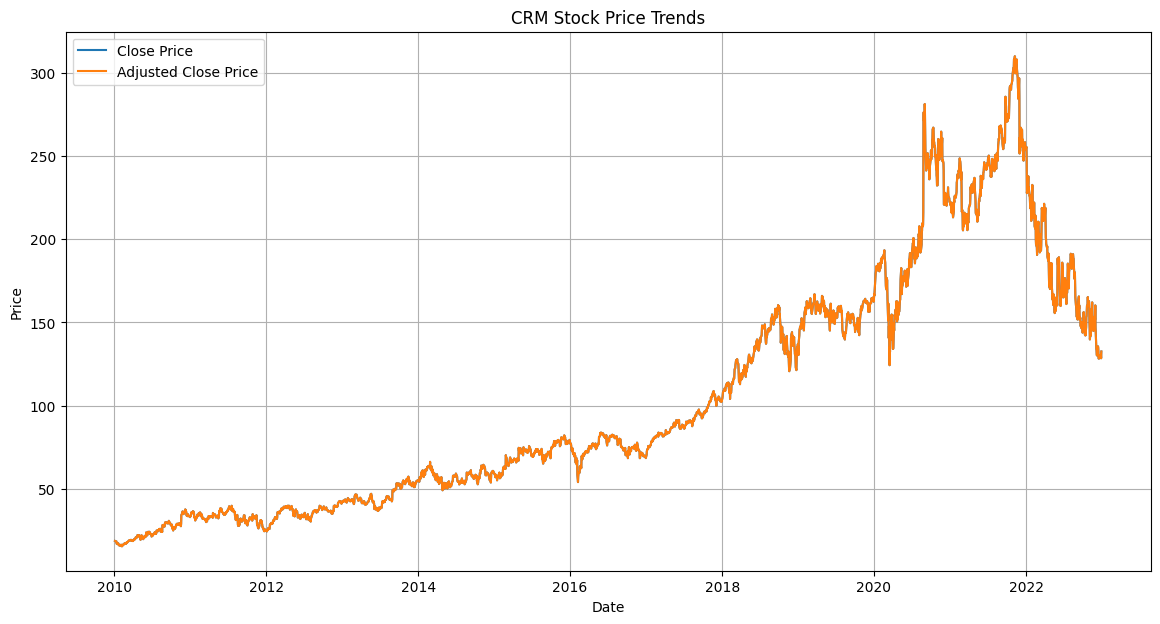

In [27]:
plot_stock_trends(stock_symbol)

In [28]:
stock_statistics(stock_symbol)

Statistics for CRM:
                                date         open         high          low  \
count                           3271  3271.000000  3271.000000  3271.000000   
mean   2016-07-01 19:28:22.598593792   103.419948   104.720219   101.999892   
min              2010-01-04 00:00:00    15.522500    15.625000    15.075000   
25%              2013-04-04 12:00:00    42.343750    42.745001    41.855000   
50%              2016-07-01 00:00:00    76.290001    77.160004    75.699997   
75%              2019-10-01 12:00:00   155.065002   157.434998   152.940002   
max              2022-12-29 00:00:00   310.000000   311.750000   307.250000   
std                              NaN    71.287894    72.149412    70.272129   

             close    adj_close        volume  
count  3271.000000  3271.000000  3.271000e+03  
mean    103.400510   103.400510  6.910973e+06  
min      15.520000    15.520000  1.084700e+06  
25%      42.391250    42.391250  4.056550e+06  
50%      76.260002    76.260

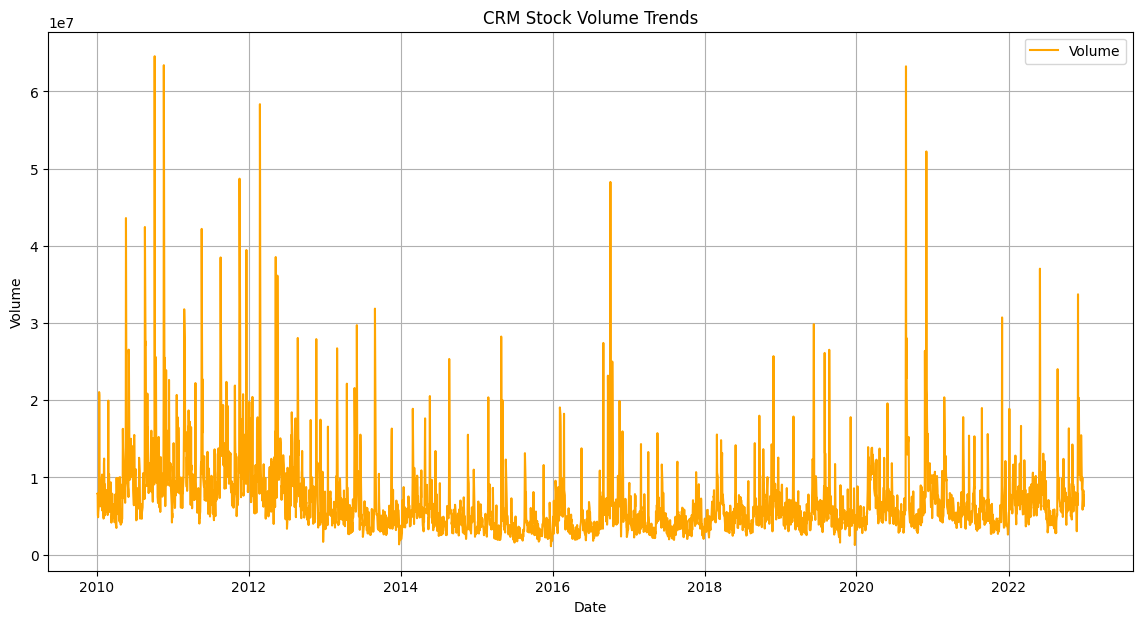

In [29]:
plot_volume_trends(stock_symbol)

C:\Users\MadMax\AppData\Local\Temp\ipykernel_21320\2929097656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['MA20'] = stock_data['close'].rolling(window=window1).mean()
C:\Users\MadMax\AppData\Local\Temp\ipykernel_21320\2929097656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['MA50'] = stock_data['close'].rolling(window=window2).mean()


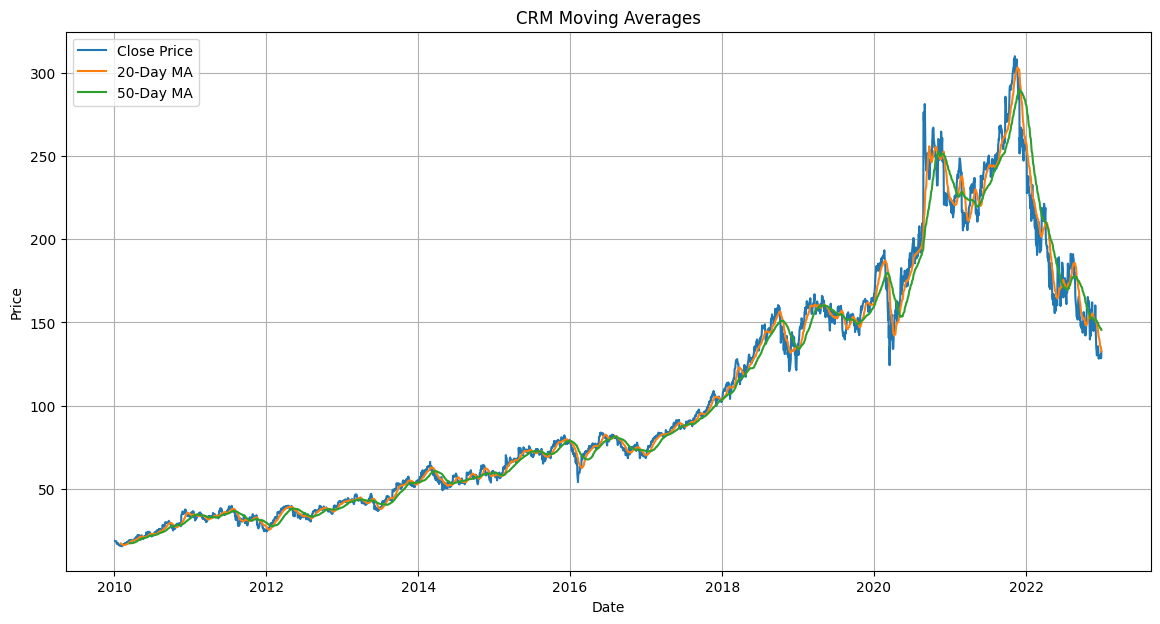

In [30]:
plot_moving_averages(stock_symbol)

C:\Users\MadMax\AppData\Local\Temp\ipykernel_21320\1944979067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Daily Return'] = stock_data['close'].pct_change()


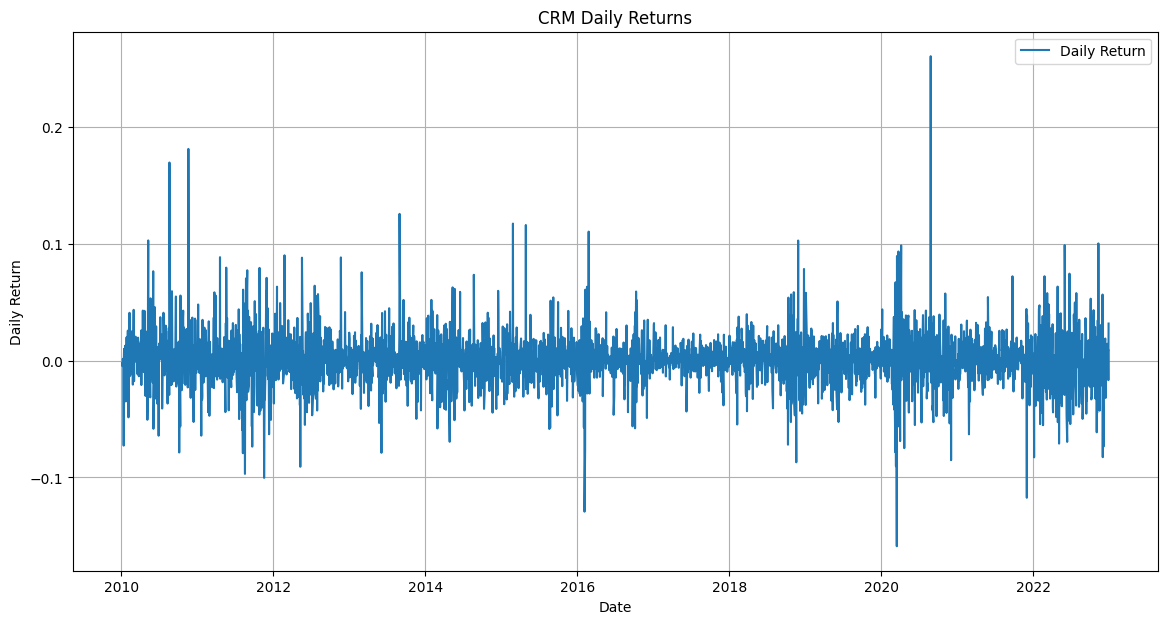

In [31]:
plot_daily_returns(stock_symbol)

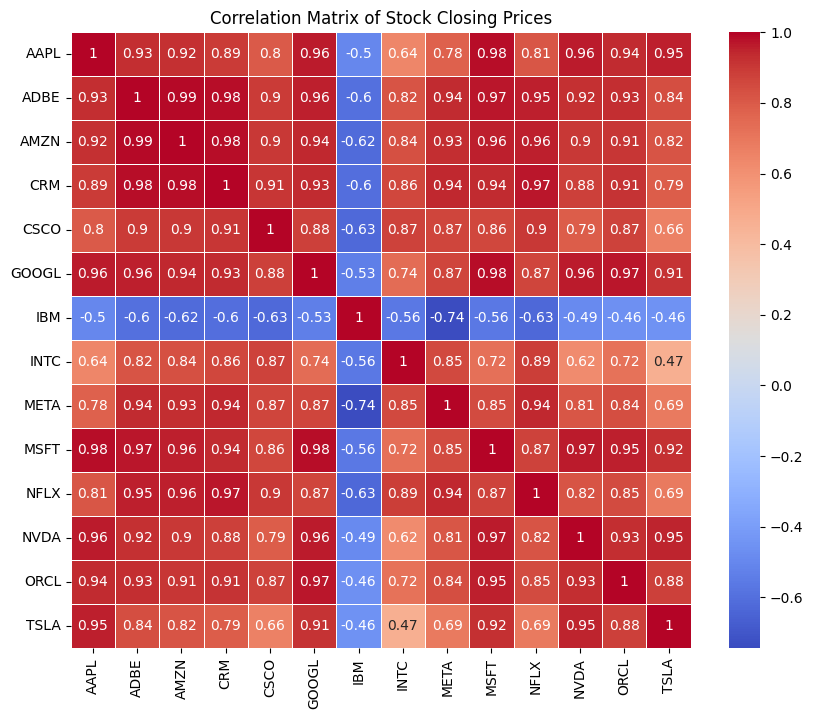

In [32]:
plot_correlation_matrix()

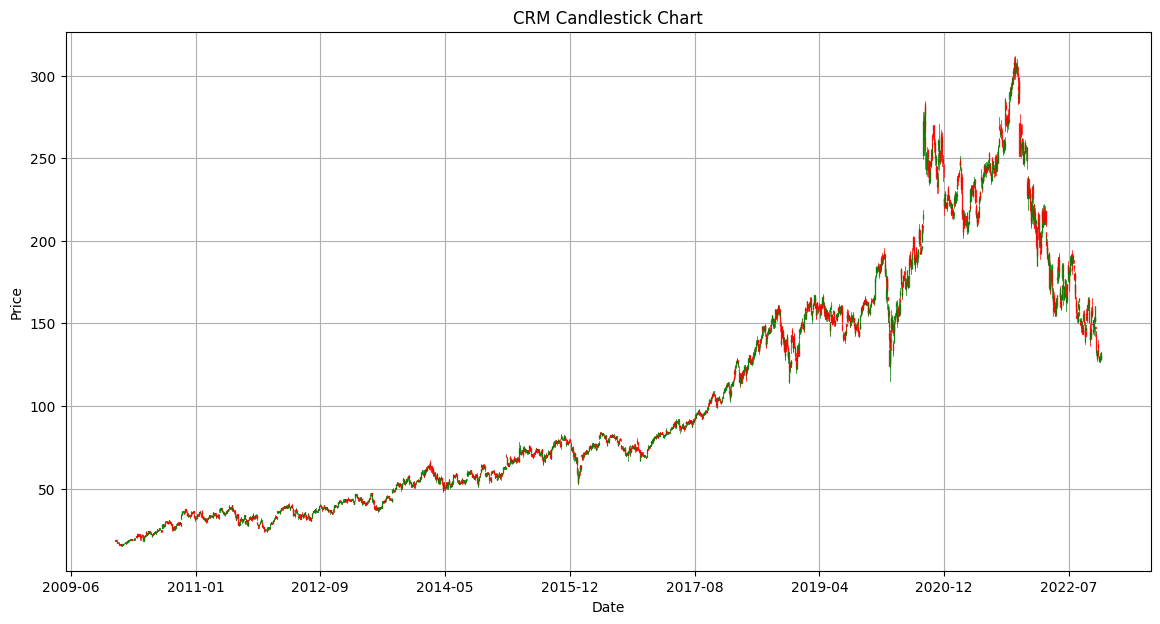

In [33]:
plot_candlestick_chart(stock_symbol)

In [34]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [35]:
def predict_next_6_months(stock_symbol):
    # Step 1: Get the data
    stock_data = get_stock_data(stock_symbol)
    stock_data = stock_data[['date', 'close']].copy()
    
    # Step 2: Convert date to ordinal (numeric)
    stock_data['date_ordinal'] = stock_data['date'].map(pd.Timestamp.toordinal)

    # Step 3: Prepare features (X) and target (y)
    X = stock_data[['date_ordinal']]
    y = stock_data['close']

    # Step 4: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Step 5: Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 6: Predict future dates (next 6 months ~180 days)
    last_date = stock_data['date'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=180)
    future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

    future_predictions = model.predict(future_ordinals)

    # Step 7: Plot
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['close'], label='Historical Close Price')
    plt.plot(future_dates, future_predictions, label='Predicted Close Price (Next 6 Months)', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_symbol} Stock Price Prediction - Next 6 Months')
    plt.legend()
    plt.grid(True)
    plt.show()

    return future_dates, future_predictions

In [38]:
stock_symbol = input("Enter stock symbol: ")

Enter stock symbol:  IBM


C:\Users\MadMax\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


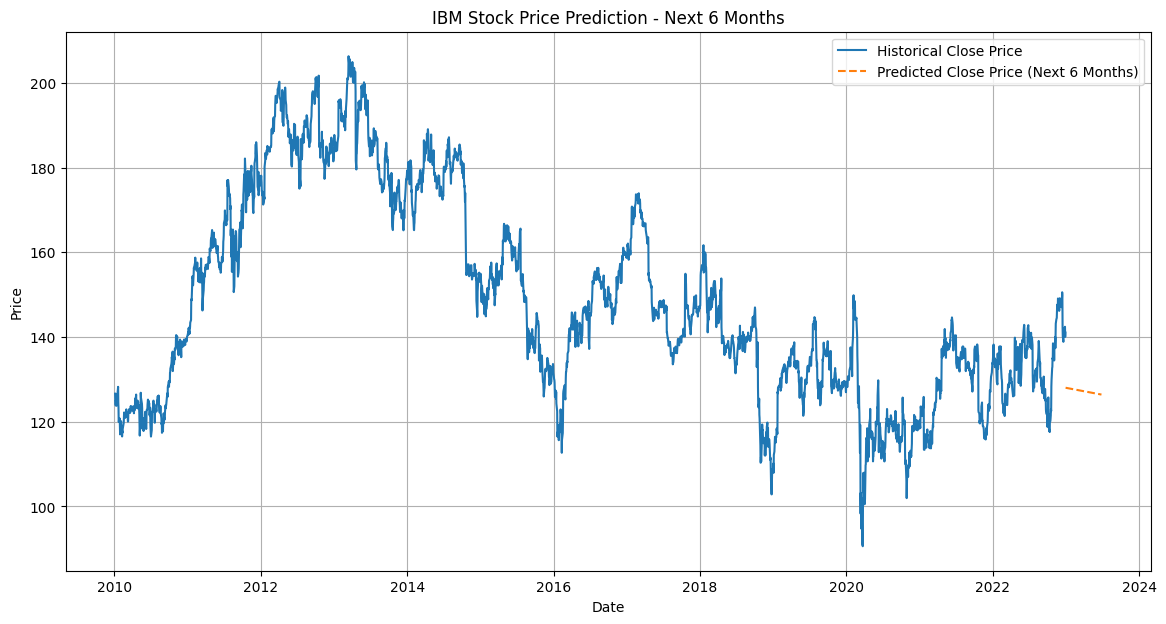

(DatetimeIndex(['2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
                '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
                '2023-01-07', '2023-01-08',
                ...
                '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21',
                '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25',
                '2023-06-26', '2023-06-27'],
               dtype='datetime64[ns]', length=180, freq='D'),
 array([128.0222604 , 128.01327163, 128.00428285, 127.99529408,
        127.9863053 , 127.97731653, 127.96832776, 127.95933898,
        127.95035021, 127.94136143, 127.93237266, 127.92338389,
        127.91439511, 127.90540634, 127.89641756, 127.88742879,
        127.87844002, 127.86945124, 127.86046247, 127.85147369,
        127.84248492, 127.83349615, 127.82450737, 127.8155186 ,
        127.80652982, 127.79754105, 127.78855228, 127.7795635 ,
        127.77057473, 127.76158595, 127.75259718, 127.74360841,
        127.73461963, 127.725

In [40]:
predict_next_6_months(stock_symbol)